# 1. Library Install & Import

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Create synthetic dataset

In [21]:
np.random.seed(42)

data_size = 300

attendance = np.random.randint(40, 100, data_size)
assignment = np.random.randint(30, 100, data_size)
midterm = np.random.randint(30, 100, data_size)
prep_time = np.random.randint(1, 10, data_size)
participation = np.random.randint(1, 10, data_size)

# Pass/Fail rule (logical rule for generating label)
result = ((attendance + assignment + midterm) > 180).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "Attendance": attendance,
    "Assignment": assignment,
    "Midterm": midterm,
    "Prep_Time": prep_time,
    "Participation": participation,
    "Result": result
})

df.head()

,Attendance,Assignment,Midterm,Prep_Time,Participation,Result
0,78,88,79,8,5,1
1,91,99,56,2,2,1
2,68,32,95,4,6,1
3,54,49,34,1,1,0
4,82,88,58,5,3,1


# 4. Data Preprocessing

In [22]:
X = df.drop("Result", axis=1)
y = df["Result"]

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. MLP Model Design & Training

In [23]:
model = MLPClassifier(
    hidden_layer_sizes=(8,4),  # 2 hidden layers
    activation='relu',
    learning_rate_init=0.01,
    max_iter=500,
    random_state=42)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 4), learning_rate_init=0.01, max_iter=500,
              random_state=42)

# 6. Model Evaluation

In [24]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9833333333333333

Confusion Matrix:
 [[22  1]
 [ 0 37]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.97      1.00      0.99        37

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# 7. Hidden Neuron Change Compare

In [25]:
model2 = MLPClassifier(
    hidden_layer_sizes=(16,8),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=500,
    random_state=42
)

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("New Accuracy:", accuracy_score(y_test, y_pred2))

New Accuracy: 1.0


# 8. Learning Rate Change

In [26]:
model3 = MLPClassifier(
    hidden_layer_sizes=(8,4),
    activation='relu',
    learning_rate_init=0.5,
    max_iter=500,
    random_state=42
)

model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("High LR Accuracy:", accuracy_score(y_test, y_pred3))

High LR Accuracy: 0.6166666666666667


# 9. Confusion Matrix Heatmap

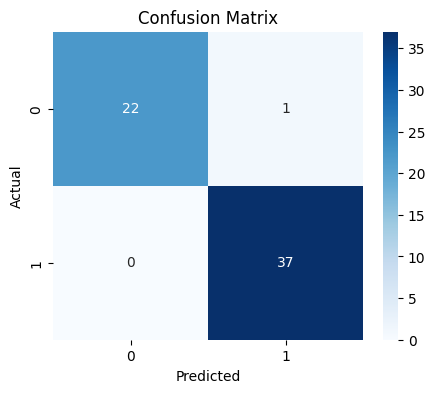

In [27]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()